<a href="https://colab.research.google.com/github/DrMiracle/Colab-Projects/blob/main/data%20analysis/LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7 індивідуальне завдання

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import math

### 1) Регресійна модель за допомогою методу найменших квадратів

In [ ]:
X=[0.175012517, 0.609466403, 0.33029121, 0.274633703, 0.440709745]
Y=[16.47572727, 11.43350814, 16.7740103, 14.89011765, 8.306046302]

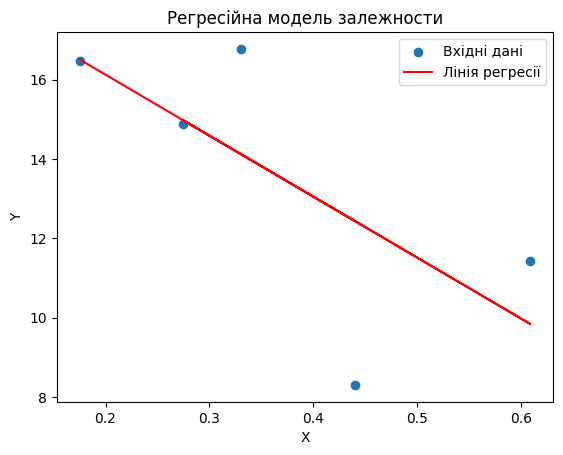

In [ ]:
# Коефіцієнти регресії
n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(Y)
xy_mean = np.mean(np.array(X) * np.array(Y))
xx_mean = np.mean(np.array(X) * np.array(X))

# Кутовий коефіцієнт
slope = (xy_mean - x_mean * y_mean) / (xx_mean - x_mean * x_mean)
# Перетин
intercept = y_mean - slope * x_mean

# Значення прогнозів за моделлю
prediction = [intercept + slope * xi for xi in X]

plt.scatter(X, Y, label='Вхідні дані')
plt.plot(X, prediction, color='red', label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регресійна модель залежности')
plt.legend()
plt.show()

In [ ]:
print("slope = " + str(slope))
print("intercept = " + str(intercept))

slope = -15.352100682709178
intercept = 19.195099514449826


### 2) Регресійна модель за допомогою коефіцієнта кореляції Пірсона

In [ ]:
X = np.array([0.175012517, 0.609466403, 0.33029121, 0.274633703, 0.440709745])
Y = np.array([16.47572727, 11.43350814, 16.7740103, 14.89011765, 8.306046302])

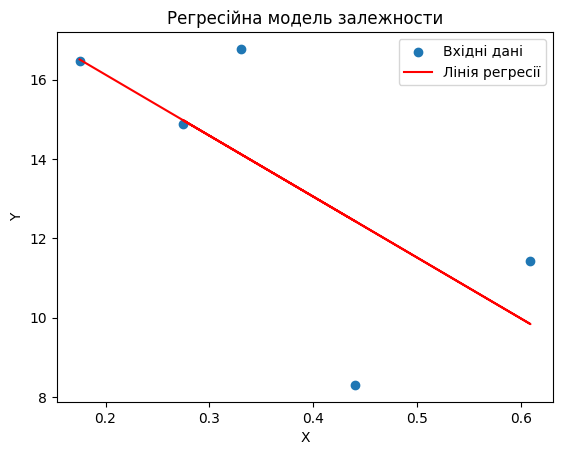

In [ ]:
x_v = sum(X)/len(X)
y_v = sum(Y)/len(Y)

# Дисперсії
sd_x = math.sqrt(sum([(x-x_v)**2 for x in X]))
sd_y = math.sqrt(sum([(y-y_v)**2 for y in Y]))

# Коваріяція
cov = sum([(x-x_v)*(y-y_v) for x,y in zip(X,Y)])

# Коефіцієнт лінійної кореляції Пірсона
r_xy = cov/(sd_x*sd_y)
# Коефіцієнт детермінації
R_2 = r_xy**2

# Кутовий коефіцієнт
slope = r_xy*(sd_y/sd_x)
# Перетин
intercept=-x_v*slope + y_v
# Лінія регресії
regression_line = slope * X + intercept

plt.scatter(X, Y, label='Вхідні дані')
plt.plot(X, regression_line, color='r', label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регресійна модель залежности')
plt.legend()
plt.show()

In [ ]:
print('X_v = ', x_v)
print('Y_v = ', y_v)
print('sd_x = ', sd_x)
print('sd_y = ', sd_y)
print('r_xy = ', r_xy)
print('R_2 = ', R_2)
print("slope = ", slope)
print("intercept = ", intercept)

X_v =  0.36602271559999994
Y_v =  13.5758819324
sd_x =  0.33310144007668685
sd_y =  7.261217294425199
r_xy =  -0.7042630234380771
R_2 =  0.49598640618214157
slope =  -15.352100682709269
intercept =  19.195099514449858


Коефіцієнт лінійної кореляції Пірсона $r_{xy} = -0.704$, що вказує на те, що незалежна змінна (вхідний параметр, на основі якого робиться прогноз) збільшується, а залежна змінна (вихідний параметр, що прогнозується) — зменшується. Це видно на графіку.

Коефіцієнт детермінації $R^2 = r_{xy}^2 = 0.496$ визначає, що спостережувані результати відтворюються моделлю на 49.6%, себто фактично половина - кореляція між даними незначна.


### 3) Регресійна модель за допомогою бібліотек

In [ ]:
X = np.array([0.175012517, 0.609466403, 0.33029121, 0.274633703, 0.440709745]).reshape(-1, 1)
Y = np.array([16.47572727, 11.43350814, 16.7740103, 14.89011765, 8.306046302])

Кутовий коефіцієнт: -15.35210068270927
Коефіцієнт перетину: 19.195099514449858
R2 (коефіцієнт детермінації): 0.49598640618214174


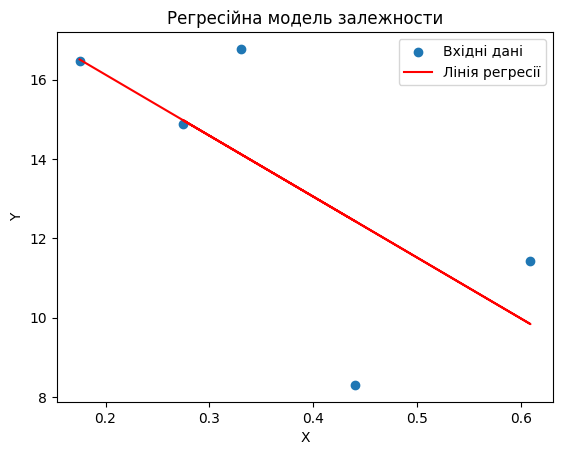

In [ ]:
# Будуємо регресійну модель
model = LinearRegression()
model.fit(X, Y)

# Значення прогнозів за моделлю
prediction = model.predict(X)

# Коефіцієнт детермінації
r2 = r2_score(Y, prediction)

# Виводимо коефіцієнти регресії та коефіцієнт детермінації
print('Кутовий коефіцієнт:', model.coef_[0])
print('Коефіцієнт перетину:', model.intercept_)
print('R2 (коефіцієнт детермінації):', r2)


plt.scatter(X, Y, label='Вхідні дані')
plt.plot(X, prediction, color='red', label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регресійна модель залежности')
plt.legend()
plt.show()

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     2.952
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.184
Time:                        11:29:55   Log-Likelihood:                -11.271
No. Observations:                   5   AIC:                             26.54
Df Residuals:                       3   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1951      3.531      5.436      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
def analyse(X,Y):
      model = sm.OLS(X,Y)
SST = sum((Y - Y.mean()) ** 2)
SSE = sum((Y - prediction) ** 2)
SSR = sum((prediction - Y.mean()) ** 2)
print(f"SST = {SST}")
print(f"SSE = {SSE}")
print(f"SSR = {SSR}")
print(f"R^2 = {SSR/SST}")


SST = 52.72527659685961
SSE = 26.574256142623828
SSR = 26.15102045423578
R^2 = 0.49598640618214174


Оскільки p-value = $0.184 > 0.05$, то ми не можемо відкинути нульову гіпотезу про те, що між вибірками нема зв'язку. Оскільки $R^2 = 0.496$, то значущої кореляції між даними нема.